# Advanced Econometrics (JEM217)– Home Assignment 2 (WS 2025)



**Authors: Sebastian Pasz, Vojtěch Dohnal, Tomáš Gabriel**

**AI Usage**

ChatGPT-5 was used during the preparation of this assignment **solely for grammatical editing and minor code optimization**.  
Any sections where AI-assisted code optimization was applied are explicitly indicated within the notebook.

## Initial Preparation

In this section, we install and load all required R packages necessary for data simulation, estimation, and visualization.  
We also set a fixed random seed (`set.seed(123)`) to ensure that all simulated results are fully reproducible.


In [3]:

req_pkgs <- c("ggplot2","dplyr","quantreg","lmtest","sandwich","car","stargazer","knitr","glm2")
for (p in req_pkgs) {
  if (!requireNamespace(p, quietly = TRUE)) {
    install.packages(p, repos = "https://cloud.r-project.org")
  }
}
library(ggplot2)
library(dplyr)
library(quantreg)
library(lmtest)
library(sandwich)
library(car)
library(stargazer)
library(knitr)
library(glm2)

set.seed(123) 


Warning message:
"package 'dplyr' was built under R version 4.4.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'quantreg' was built under R version 4.4.3"
Loading required package: SparseM

Warning message:
"package 'SparseM' was built under R version 4.4.3"
Warning message:
"package 'lmtest' was built under R version 4.4.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.4.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'sandwich' was built under R version 4.4.3"
Warning message:
"package 'car' was built under R version 4.4.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.4.3"

Attaching package: 'car'


The following

## Problem 1 (a)
Simulating the $e_t$ process. And checking length of all 3 variables. We can see that all have length 1000.



In [7]:
T_full <- 1002                 # total length for e_t
e      <- rnorm(T_full, 0, 1)  # e_t ~ N(0,1)

e_t   <- e[3:T_full]           # t = 3..1002  -> length 1000
e_t_1 <- e[2:(T_full-1)]       # t-1
e_t_2 <- e[1:(T_full-2)]       # t-2

print(paste0(
  "Length e_t: ", length(e_t),
  ", t-1: ", length(e_t_1),
  ", t-2: ", length(e_t_2)
))

mu_true   <- 0
theta1_true <- 0.75
theta2_true <- 0.5
sigma2_true <- 1  # variance of e_t in DGP

y <- mu_true + e_t + theta1_true * e_t_1 + theta2_true * e_t_2
T <- length(y)
summary(y)

[1] "Length e_t: 1000, t-1: 1000, t-2: 1000"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.55739 -0.98414 -0.01426 -0.04724  0.81560  4.30453 

## (b)
Cheching ACF and PACF to see if the model is indeed MA(2)
From ACF we can see that the process looks MA(2) - because the first two lags values are very high (far from zero) and for lags <2 values are close to zero indicating that the proces is not of higher order.

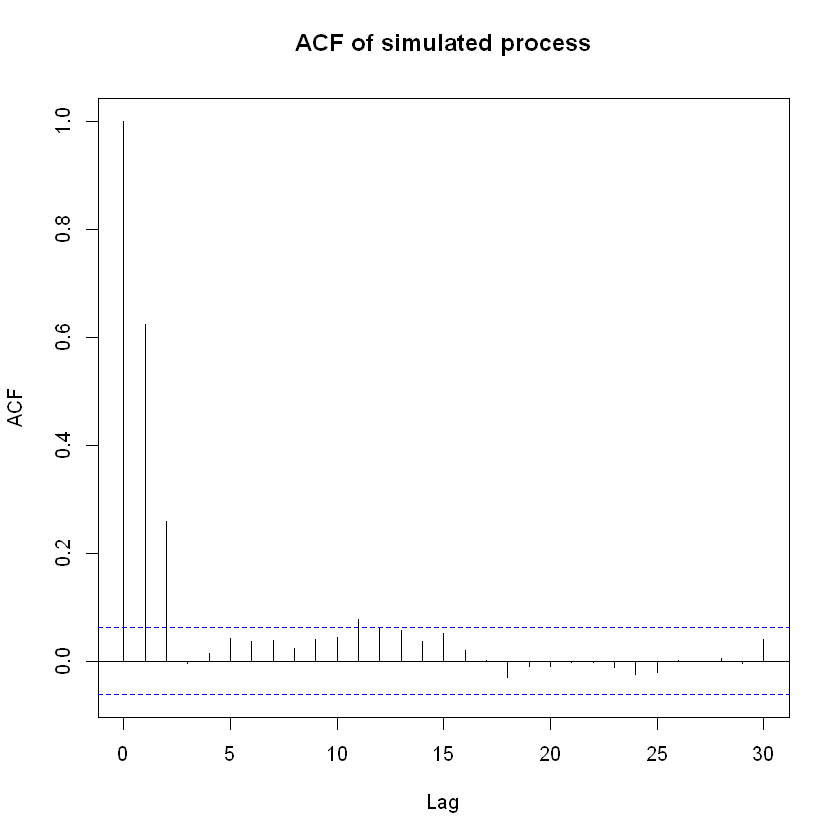

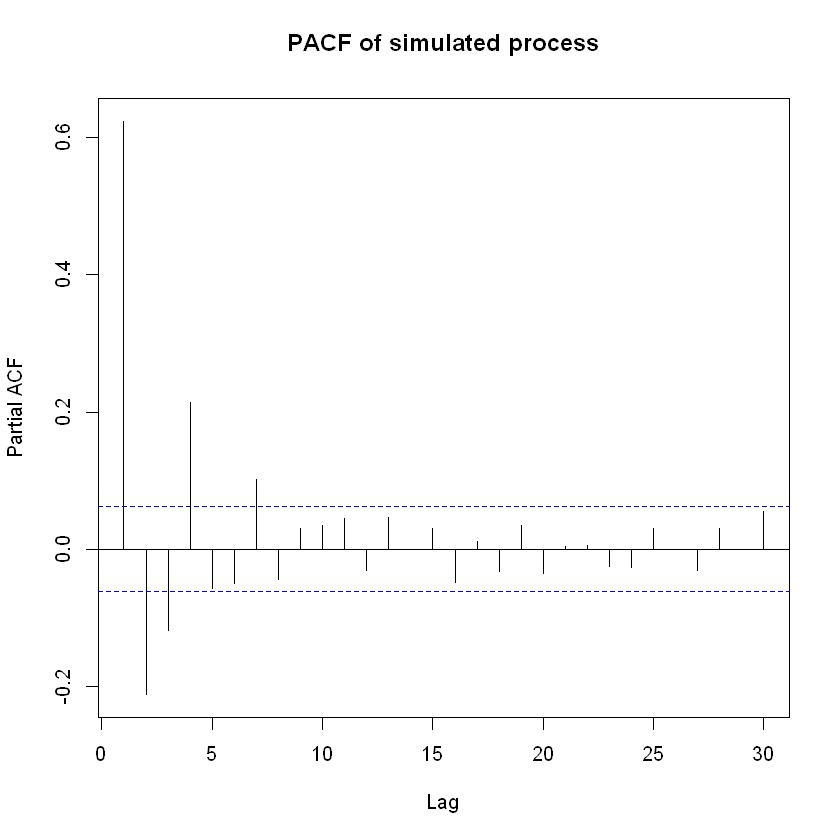

In [9]:
par(bg = "white")
acf(y, main = "ACF of simulated process")
pacf(y, main = "PACF of simulated process")